<a href="https://colab.research.google.com/github/akhilps45/Machine_Learning_Models/blob/main/LinearReg_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the NYC Taxi Trip Duration - Intermediate ML Project

Our requirement is to determine when will the person arrive before booking the taxi.

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime



*   Reading data
*   Setting data size as nrows = 100000




In [102]:
data = pd.read_csv('/content/NYC.csv',nrows=100000)

In [103]:
data.size

1100000

In [104]:
data.shape

(100000, 11)

In [105]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.53349,1.667810,-73.973464,40.751059,-73.973455,40.751947,939.864260
std,0.49888,1.317603,0.038294,0.028152,0.036625,0.032452,3004.541199
min,1.00000,0.000000,-74.533875,40.433842,-74.562355,40.441662,1.000000
25%,1.00000,1.000000,-73.991852,40.737370,-73.991394,40.735844,396.000000
50%,2.00000,1.000000,-73.981712,40.754269,-73.979782,40.754478,662.000000
75%,2.00000,2.000000,-73.967209,40.768426,-73.962919,40.769928,1076.000000
max,2.00000,6.000000,-73.334023,41.319164,-72.711395,41.311520,86390.000000


In [106]:
data.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


nunique() = to fetch the total number of unique values in column vendor id

In [107]:
data['vendor_id'].nunique()

2

In [108]:
data['vendor_id'].value_counts()

,count
vendor_id,
2,53349
1,46651


So we need to convert vendor id to object


*   1 = Uber
*   2 = Ola



In [109]:
data1 = data.drop(['id','dropoff_datetime'],axis=1) #we dont need these columns

In [110]:
data1.shape

(100000, 9)

In [111]:
data1['vendor_id'] = data1['vendor_id'].map({1:'Uber',2:'Ola'})

In [112]:
data1.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,Ola,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,Uber,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,Ola,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,Ola,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,Ola,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Here i'm going to change the pickup_datetime into new 2 columns as


*  TRAVEL DATE
*  TRAVEL TIME



In [113]:
data1.dtypes

,0
vendor_id,object
pickup_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object
trip_duration,int64


Converting into new column as travel day and printing as days

In [114]:
data1['travel_day'] = pd.to_datetime(data1['pickup_datetime']).apply(lambda x:x.strftime('%A'))

In [115]:
data1.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,travel_day
0,Ola,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday
1,Uber,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday
2,Ola,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday
3,Ola,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday
4,Ola,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday


Converting into new column as travel time and printing as time

In [116]:
def time_bucket(x):
  hour = int(x.strftime('%H'))
  if hour < 6 or hour >= 22:
    return 'night'
  elif hour < 12:
    return 'morning'
  elif hour < 18:
    return 'afternoon'
  else:
    return 'evening'

In [117]:
data1['travel_time'] = pd.to_datetime(data1['pickup_datetime']).apply(lambda x:time_bucket(x))

In [118]:
data1.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,travel_day,travel_time
0,Ola,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,afternoon
1,Uber,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,night
2,Ola,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,morning
3,Ola,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,evening
4,Ola,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,afternoon


Now we dont need the column pickup_datetime

In [119]:
data1.drop('pickup_datetime',axis=1,inplace=True)

In [120]:
data1.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,travel_day,travel_time
0,Ola,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,afternoon
1,Uber,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,night
2,Ola,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,morning
3,Ola,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,evening
4,Ola,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,afternoon


Check for null values

In [121]:
data1.isna().sum()

,0
vendor_id,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0
trip_duration,0
travel_day,0
travel_time,0


Checking datatypes

In [122]:
data1.dtypes

,0
vendor_id,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object
trip_duration,int64
travel_day,object
travel_time,object


Now we do One hot Encoding

In [123]:
obj_df = data1.select_dtypes(include = ['object'])
obj_df

,vendor_id,store_and_fwd_flag,travel_day,travel_time
0,Ola,N,Monday,afternoon
1,Uber,N,Sunday,night
2,Ola,N,Tuesday,morning
3,Ola,N,Wednesday,evening
4,Ola,N,Saturday,afternoon
...,...,...,...,...
99995,Uber,N,Monday,evening
99996,Ola,N,Thursday,morning
99997,Ola,N,Thursday,night
99998,Uber,N,Monday,morning


In [124]:
num_df = data1.select_dtypes(include = ['float64','int64'])
num_df

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,1,-73.982155,40.767937,-73.964630,40.765602,455
1,1,-73.980415,40.738564,-73.999481,40.731152,663
2,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,1,-74.010040,40.719971,-74.012268,40.706718,429
4,1,-73.973053,40.793209,-73.972923,40.782520,435
...,...,...,...,...,...,...
99995,1,-73.958275,40.772923,-73.965645,40.763599,313
99996,6,-73.958778,40.766708,-73.956139,40.779018,738
99997,1,-73.945961,40.780510,-73.861778,40.768421,968
99998,1,-73.983887,40.738544,-73.970932,40.751678,597


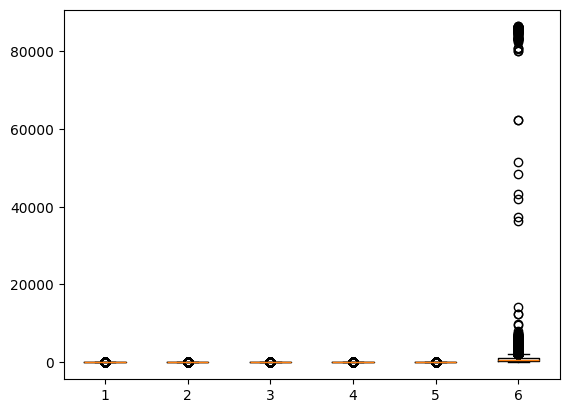

In [125]:
plt.boxplot(num_df)
plt.show()

In [126]:
def clip_outliers(data1,column_name):
  q1=data1[column_name].quantile(0.25)
  q3=data1[column_name].quantile(0.75)
  iqr=q3 - q1
  upper_bound=q3 + 1.5 * iqr
  lower_bound=q1 - 1.5 * iqr
  data1[column_name]=data1[column_name].clip(upper=upper_bound)
  data1[column_name]=data1[column_name].clip(lower=lower_bound)
  return data1[column_name]

In [127]:
for col in num_df:
  num_df[col]=clip_outliers(num_df,col)

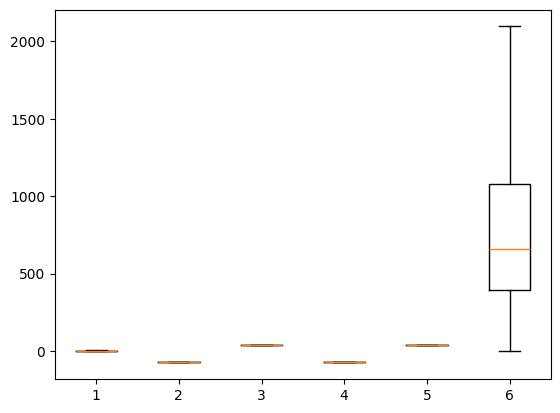

In [128]:
plt.boxplot(num_df)
plt.show()

In [129]:
obj_dummies = pd.get_dummies(obj_df,drop_first=True)
obj_dummies.head()

,vendor_id_Uber,store_and_fwd_flag_Y,travel_day_Monday,travel_day_Saturday,travel_day_Sunday,travel_day_Thursday,travel_day_Tuesday,travel_day_Wednesday,travel_time_evening,travel_time_morning,travel_time_night
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,True,False,False,False,False,False,True
2,False,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,True,True,False,False
4,False,False,False,True,False,False,False,False,False,False,False


In [130]:
obj_dummies.shape

(100000, 11)

In [131]:
num_df.shape

(100000, 6)

In [132]:
final_df = pd.concat([obj_dummies,num_df],axis=1)
final_df.head()

,vendor_id_Uber,store_and_fwd_flag_Y,travel_day_Monday,travel_day_Saturday,travel_day_Sunday,travel_day_Thursday,travel_day_Tuesday,travel_day_Wednesday,travel_time_evening,travel_time_morning,travel_time_night,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,False,False,True,False,False,False,False,False,False,False,False,1.0,-73.982155,40.767937,-73.964630,40.765602,455
1,True,False,False,False,True,False,False,False,False,False,True,1.0,-73.980415,40.738564,-73.999481,40.731152,663
2,False,False,False,False,False,False,True,False,False,True,False,1.0,-73.979027,40.763939,-74.005333,40.710087,2096
3,False,False,False,False,False,False,False,True,True,False,False,1.0,-74.010040,40.719971,-74.012268,40.706718,429
4,False,False,False,True,False,False,False,False,False,False,False,1.0,-73.973053,40.793209,-73.972923,40.782520,435


In [133]:
final_df.shape

(100000, 17)

In [134]:
X = final_df.drop('trip_duration',axis=1)
y = final_df['trip_duration']

# Splitting into test and train data

In [135]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [136]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [137]:
y_pred = model.predict(X_test)

In [138]:
y_pred

array([962.17792773, 663.01903327, 628.55576718, ..., 866.93690704,
       851.47622072, 702.10596275])

In [139]:
mean_absolute_error(y_test,y_pred)

398.2471597752753

In [140]:
mean_squared_error(y_test,y_pred)

250083.12444670792

In [141]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(500.08311753818276)

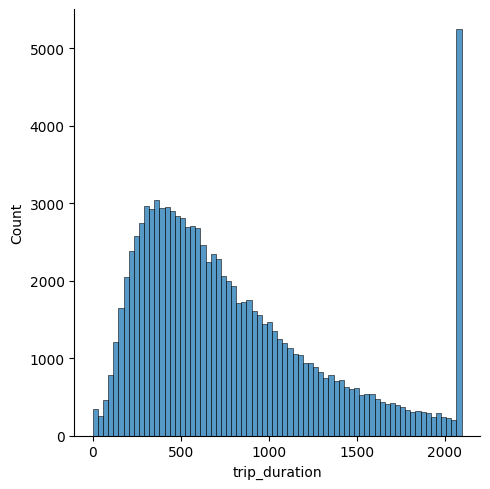

In [142]:
sns.displot(final_df['trip_duration'])

In [143]:
r2_score(y_test,y_pred)

0.1272812766777599